<a href="https://colab.research.google.com/github/KRamBalaji/FedEx-Logistics-Performance-Analysis/blob/main/EDA_FedEx_Logistics_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **FedEx Logistics Performance Analysis**


##### **Project Type**    - EDA
##### **Contribution**    - Individual/Team



# **Project Summary -**

#### **Define Your Business Objective?**

***Improving efficiency and effectiveness of various logistics processes***

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


5. You have to create at least 20 logical & meaningful charts having important insights.

[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [25]:
# Import Libraries
import numpy as np
import pandas as pd
import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

### Dataset Loading

In [26]:
# Importing the dataset
from google.colab import drive
drive.mount('/content/drive')

dataset = pd.read_csv('/content/drive/My Drive/SCMS_Delivery_History_Dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [27]:
# Dataset First
dataset.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


### Dataset Rows & Columns count

In [28]:
# Dataset Rows & Columns
dataset.shape

(10324, 33)

### Dataset Information

In [29]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Duplicate Values

In [30]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [31]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

<Axes: >

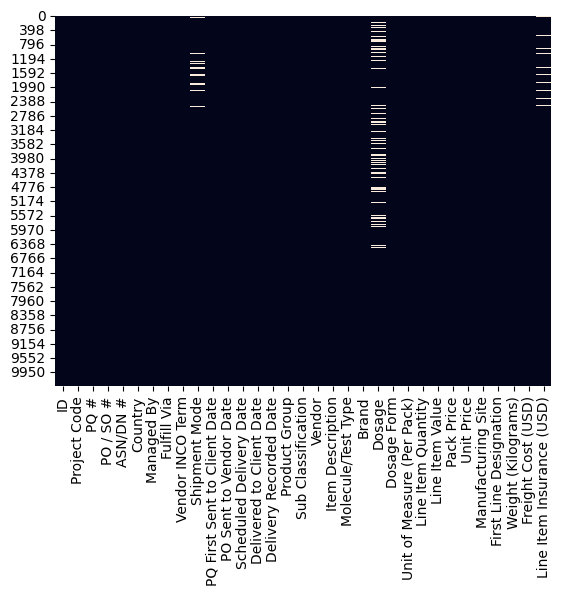

In [32]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

The dataset given is a dataset from Logistics industry.

This project focuses on analyzing the performance of a logistics operation. The goal is to evaluate the efficiency and effectiveness of various logistics processes, identify areas for improvement, and provide data-driven recommendations to optimize operations and reduce costs.

The above dataset has 10324 rows and 33 columns. There are no duplicate values in the dataset. But there are 360 missing values in 'Shipment Mode' column, 1736 missing values in 'Dosage' column, 287 missing values in 'Line Item Insurance (USD)' column.

## ***2. Understanding Your Variables***

In [33]:
# Dataset Columns
dataset.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [34]:
# Dataset Describe
dataset.describe(include='all')

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
count,10324.000000,10324,10324,10324,10324,10324,10324,10324,10324,9964,...,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10324,10324,10324,10324,10037.000000
unique,NaN,142,1237,6233,7030,43,4,2,8,4,...,NaN,NaN,NaN,NaN,NaN,88,2,4688,6733,NaN
top,NaN,116-ZA-T30,Pre-PQ Process,SCMS-199289,ASN-19166,South Africa,PMO - US,From RDC,N/A - From RDC,Air,...,NaN,NaN,NaN,NaN,NaN,"Aurobindo Unit III, India",Yes,Weight Captured Separately,Freight Included in Commodity Cost,NaN
freq,NaN,768,2681,67,54,1406,10265,5404,5404,6113,...,NaN,NaN,NaN,NaN,NaN,3172,7030,1507,1442,NaN
mean,51098.968229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,NaN,NaN,NaN,NaN,240.117626
std,31944.332496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,NaN,NaN,NaN,NaN,500.190568
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,12795.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,408.000000,4.314593e+03,4.120000,0.080000,NaN,NaN,NaN,NaN,6.510000
50%,57540.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,NaN,NaN,NaN,NaN,47.040000
75%,83648.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,NaN,NaN,NaN,NaN,252.400000


### Variables Description

* **ID** : Unique identifier for each logistics
* **Project Code** : Code representing the project or initiative tied to the shipment.
* **PQ #** : Price Quotation reference number.
* **PO / SO #** : Purchase Order or Sales Order associated with the shipment.
* **ASN/DN #** : Advanced Shipment Notice or Delivery Note reference.
* **Country** : Destination country for the shipment (e.g., Côte d'Ivoire, Vietnam).
* **Managed By** : Specifies which team manages the project (e.g., PMO-US).
* **Fulfill Via** : Method of fulfillment, such as direct drop shipment.
* **Vendor INCO Term** : Incoterms defining the shipment agreement (e.g., EXW, FCA).
* **Shipment Mode** : The mode of transportation used (e.g., air).
* **PQ First Sent to Client Date** : The date the Price Quotation was first sent to the client (some records indicate "Pre-PQ Process").
* **PO Sent to Vendor Date** : Date the purchase order was sent to the vendor.
* **Scheduled Delivery Date** : The planned date for delivery.
* **Delivered to Client Date** : The actual date the shipment was delivered.
* **Delivery Recorded Date** : Date when delivery was recorded.
* **Product Group** : General classification of the product (e.g., HIV test, ARV Pediatric).
* **Sub Classification** : Further categorization of the product.
* **Vendor** : The company supplying the goods (e.g., RANBAXY Fine Chemicals LTD, Aurobindo Pharma Limited).
* **Item Description** : Detailed description of the item being shipped.
* **Molecule/Test Type** : The type of test or pharmaceutical molecule (e.g., HIV, Nevirapine).
* **Brand** : The brand name of the product (e.g., Reveal, Generic).
* **Dosage** : The dosage strength of the pharmaceutical product (if applicable).
* **Dosage Form** : The form in which the product is delivered (e.g., test kit, oral suspension).
* **Unit of Measure (Per Pack)** : The number of units per pack.
* **Line Item Quantity** : The total number of units shipped.
* **Line Item Value** : The total value of the line item in the shipment.
* **Pack Price** : Price per pack of the item.
* **Unit Price** : Price per individual unit of the item.
* **Manufacturing Site** : The location where the item was manufactured (e.g., Ranbaxy Fine Chemicals LTD, Aurobindo Unit III, India).
* **First Line Designation** : Indicates whether the product is designated for first-line use.
* **Weight (Kilograms)** : The weight of the shipment.
* **Freight Cost (USD)** : The cost of shipping the item in U.S. dollars.
* **Line Item Insurance (USD)** : Insurance cost for the line item, if applicable.

### Check Unique Values for each variable.

In [35]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  ID is 10324 .
No. of unique values in  Project Code is 142 .
No. of unique values in  PQ # is 1237 .
No. of unique values in  PO / SO # is 6233 .
No. of unique values in  ASN/DN # is 7030 .
No. of unique values in  Country is 43 .
No. of unique values in  Managed By is 4 .
No. of unique values in  Fulfill Via is 2 .
No. of unique values in  Vendor INCO Term is 8 .
No. of unique values in  Shipment Mode is 4 .
No. of unique values in  PQ First Sent to Client Date is 765 .
No. of unique values in  PO Sent to Vendor Date is 897 .
No. of unique values in  Scheduled Delivery Date is 2006 .
No. of unique values in  Delivered to Client Date is 2093 .
No. of unique values in  Delivery Recorded Date is 2042 .
No. of unique values in  Product Group is 5 .
No. of unique values in  Sub Classification is 6 .
No. of unique values in  Vendor is 73 .
No. of unique values in  Item Description is 184 .
No. of unique values in  Molecule/Test Type is 86 .
No. of unique values in  

## 3. ***Data Wrangling***

### Data Wrangling Code

In [36]:
#finding unique dosage forms
print(dataset['Dosage Form'].unique())

['Test kit' 'Oral suspension' 'Tablet' 'Capsule' 'Oral solution'
 'Tablet - FDC' 'Powder for oral solution' 'Test kit - Ancillary'
 'Chewable/dispersible tablet' 'Delayed-release capsules - blister'
 'Tablet - blister' 'Tablet - FDC + blister' 'Tablet - FDC + co-blister'
 'Injection' 'Delayed-release capsules'
 'Chewable/dispersible tablet - FDC' 'Oral powder']


In [37]:
#finding which dosage forms has dosage 'null'
dosage_null = dataset[(dataset['Dosage'].isnull())]
print(dosage_null['Dosage Form'].unique())

['Test kit' 'Test kit - Ancillary']


In [38]:
# Set 'Dosage' to '1 Kit' if 'Dosage Form' is 'Test Kit' or 'Test kit - Ancillary'
dataset['Dosage'] = np.where(dataset['Dosage Form'].isin(['Test kit', 'Test kit - Ancillary']), '1 Kit', dataset['Dosage'])

print(dataset['Dosage'].isnull().sum())

0


In [39]:
# Impute missing values in 'Shipment Mode' with mode
dataset.dropna(inplace=True)

# Verify if missing values are handled
print(dataset.isnull().sum())

ID                              0
Project Code                    0
PQ #                            0
PO / SO #                       0
ASN/DN #                        0
Country                         0
Managed By                      0
Fulfill Via                     0
Vendor INCO Term                0
Shipment Mode                   0
PQ First Sent to Client Date    0
PO Sent to Vendor Date          0
Scheduled Delivery Date         0
Delivered to Client Date        0
Delivery Recorded Date          0
Product Group                   0
Sub Classification              0
Vendor                          0
Item Description                0
Molecule/Test Type              0
Brand                           0
Dosage                          0
Dosage Form                     0
Unit of Measure (Per Pack)      0
Line Item Quantity              0
Line Item Value                 0
Pack Price                      0
Unit Price                      0
Manufacturing Site              0
First Line Des

In [40]:
# Convert date columns to datetime objects with explicit format
dataset['Scheduled Delivery Date'] = pd.to_datetime(dataset['Scheduled Delivery Date'], format='%d-%b-%y')
dataset['Delivered to Client Date'] = pd.to_datetime(dataset['Delivered to Client Date'], format='%d-%b-%y')
dataset['Delivery Recorded Date'] = pd.to_datetime(dataset['Delivery Recorded Date'], format='%d-%b-%y')

# Verify the data types
print(dataset.dtypes)

ID                                       int64
Project Code                            object
PQ #                                    object
PO / SO #                               object
ASN/DN #                                object
Country                                 object
Managed By                              object
Fulfill Via                             object
Vendor INCO Term                        object
Shipment Mode                           object
PQ First Sent to Client Date            object
PO Sent to Vendor Date                  object
Scheduled Delivery Date         datetime64[ns]
Delivered to Client Date        datetime64[ns]
Delivery Recorded Date          datetime64[ns]
Product Group                           object
Sub Classification                      object
Vendor                                  object
Item Description                        object
Molecule/Test Type                      object
Brand                                   object
Dosage       

In [41]:
# Create 'Delivery Delay' column
dataset['Delivery Delay'] = (dataset['Delivered to Client Date'] - dataset['Scheduled Delivery Date']).dt.days

In [42]:
delayed_deliveries = dataset[dataset['Delivery Delay'] > 0]

# Display the delayed deliveries
print(delayed_deliveries)

          ID Project Code            PQ #   PO / SO #  ASN/DN #  \
24       130   100-HT-T01  Pre-PQ Process  SCMS-10080   ASN-628   
72       772   131-NG-T01  Pre-PQ Process  SCMS-30502  ASN-3653   
122     1196   102-BW-T01  Pre-PQ Process  SCMS-46071  ASN-4324   
202     1926   116-ZA-T01  Pre-PQ Process  SCMS-26820  ASN-2487   
263     2539   104-CI-T01  Pre-PQ Process  SCMS-44120  ASN-4289   
...      ...          ...             ...         ...       ...   
10303  86800   111-MZ-T30       FPQ-15195    SO-50141   DN-4231   
10304  86801   111-MZ-T30       FPQ-13575    SO-47707   DN-4234   
10305  86802   111-MZ-T30       FPQ-15195    SO-50130   DN-4235   
10306  86803   111-MZ-T30       FPQ-14843    SO-49721   DN-4236   
10320  86819   104-CI-T30       FPQ-15259    SO-50102   DN-4313   

             Country Managed By  Fulfill Via Vendor INCO Term Shipment Mode  \
24             Haiti   PMO - US  Direct Drop              EXW           Air   
72           Nigeria   PMO - US  Dire